### Make Predictions on new images

In [1]:
from keras.models import model_from_json
import cv2
import dlib
from skimage.transform import resize
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
### HERE comes the image collection code

In [3]:
## Test on Valid dataset

In [5]:
dataset=pd.read_csv('../train_full_df.csv')
dataset.head()

,Unnamed: 0,ID,path,id,name,height,weight,bmi
0,0,akshay,images/akshay1.jpeg,1,akshay kumar,1.78,80,25.249337
1,1,akshay,images/akshay10.jpg,1,akshay kumar,1.78,80,25.249337
2,2,akshay,images/akshay11.jpg,1,akshay kumar,1.78,80,25.249337
3,3,akshay,images/akshay12.jpg,1,akshay kumar,1.78,80,25.249337
4,4,akshay,images/akshay13.jpg,1,akshay kumar,1.78,80,25.249337


In [6]:
all_paths_val=dataset['path'].tolist()
all_bmi_val=dataset['bmi']

In [7]:
def preprocess_image(img=None,data=None,image_path=None):
    if image_path:
        image_path=str(path)
        img = cv2.imread(image_path)
        data= image.imread(image_path)
    
    gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
    detector = dlib.get_frontal_face_detector()
    faces = detector(gray)
    if len(faces)>0:
        x1 = faces[0].left() # left point
        y1 = faces[0].top() # top point
        x2 = faces[0].right() # right point
        y2 = faces[0].bottom()
        face_out=cv2.rectangle(img=img, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0))

        ## Add some margin on the faces
        margin20_x=int(((x2-x1)*0.2)//2)
        margin20_y=int(((y2-y1)*0.2)//2)

        margin10_x=int(((x2-x1)*0.1)//2)
        margin10_y=int(((y2-y1)*0.1)//2)

        output= data[y1-margin20_y:y2+margin20_y,x1-margin20_x:x2+margin20_x,:]

        #resized_data = resize(output, (300, 300, 3))

        resized_data = cv2.resize(output, (300, 300), interpolation = cv2.INTER_AREA)
    else:
        resized_data=None
        
    return resized_data

In [8]:
import pickle

model_name1='model_without_tl_without_aug'
json_file = open(model_name1+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model1 = model_from_json(loaded_model_json)
# load weights into new model
loaded_model1.load_weights(model_name1+".h5")



model_name2='model_without_tl_with_aug'
json_file = open(model_name2+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model2 = model_from_json(loaded_model_json)
# load weights into new model
loaded_model2.load_weights(model_name2+".h5")



model_name3='model_with_tl_without_aug'
json_file = open(model_name3+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model3 = model_from_json(loaded_model_json)
# load weights into new model
loaded_model3.load_weights(model_name3+".h5")


model_name4='model_with_tl_with_aug'
json_file = open(model_name4+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model4 = model_from_json(loaded_model_json)
# load weights into new model
loaded_model4.load_weights(model_name4+".h5")


model_name6='model_random_forest.pkl'
with open(model_name6,'rb') as file:
    loaded_model6=pickle.load(file)
# y_pred_rf=model_loaded.predict(X_test)
# y_pred_train_rf=model_loaded.predict(X_train)

print("Loaded models from disk")



Loaded models from disk


/Users/anilinamdar/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/anilinamdar/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [9]:
import face_recognition

def get_face_encoding_from_message(msg):
    my_face_encoding = face_recognition.face_encodings(msg)
    if not my_face_encoding:
        return np.zeros(128).tolist()
    return my_face_encoding[0].tolist()

In [10]:
# new_image[:,:,:3].shape

NameError: name 'new_image' is not defined

0
1


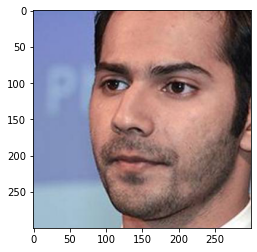

True BMI 25.2493372
Predicted BMI 3:  30.837702
Predicted BMI 6:  24.889157674697998
Difference:  5.588364597485352
*************************************************************************

2


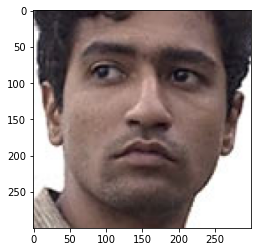

True BMI 25.2493372
Predicted BMI 3:  26.083292
Predicted BMI 6:  25.030925033533237
Difference:  0.8339548074462897
*************************************************************************

3


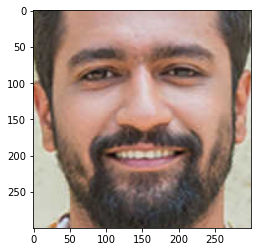

True BMI 25.2493372
Predicted BMI 3:  23.441858
Predicted BMI 6:  25.062096866655043
Difference:  1.8074789083740228
*************************************************************************

4


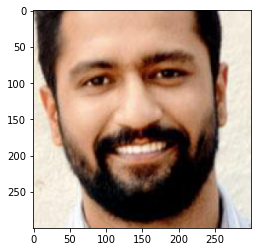

True BMI 25.2493372
Predicted BMI 3:  26.771244
Predicted BMI 6:  25.049575250354536
Difference:  1.5219068490722663
*************************************************************************

5


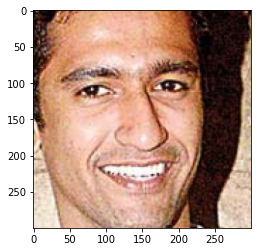

True BMI 25.2493372
Predicted BMI 3:  24.261652
Predicted BMI 6:  24.922369635997537
Difference:  0.9876852072021478
*************************************************************************

6


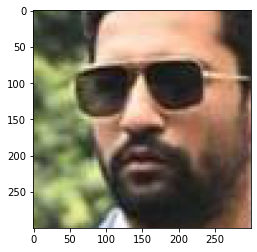

True BMI 25.2493372
Predicted BMI 3:  26.800867
Predicted BMI 6:  24.996151538138765
Difference:  1.5515298806884772
*************************************************************************

7


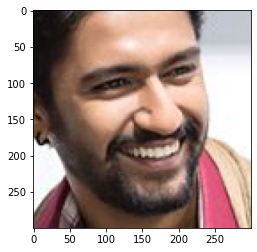

True BMI 25.2493372
Predicted BMI 3:  32.561398
Predicted BMI 6:  24.93750125344
Difference:  7.312060352490235
*************************************************************************

8


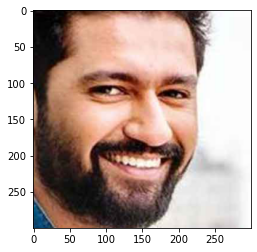

True BMI 25.2493372
Predicted BMI 3:  29.819784
Predicted BMI 6:  25.042746275900623
Difference:  4.570446964428712
*************************************************************************

9


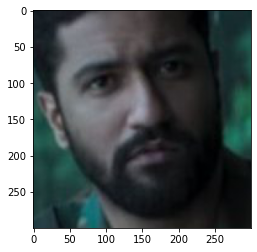

True BMI 25.2493372
Predicted BMI 3:  19.559301
Predicted BMI 6:  24.97346509875974
Difference:  5.690035823657226
*************************************************************************

10


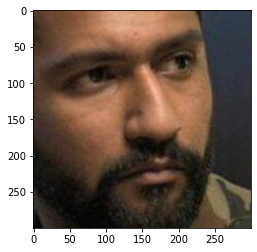

True BMI 25.2493372
Predicted BMI 3:  22.02187
Predicted BMI 6:  25.38252218866501
Difference:  3.2274675405761712
*************************************************************************

11


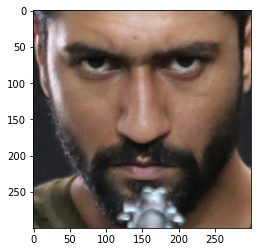

True BMI 25.2493372
Predicted BMI 3:  26.020823
Predicted BMI 6:  24.97035806427224
Difference:  0.7714853250244147
*************************************************************************

12


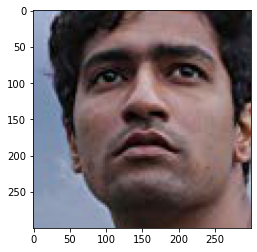

True BMI 25.2493372
Predicted BMI 3:  30.885956
Predicted BMI 6:  24.992635723496388
Difference:  5.636618610546876
*************************************************************************

13


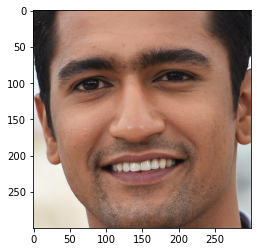

True BMI 25.2493372
Predicted BMI 3:  22.755085
Predicted BMI 6:  24.990490470758544
Difference:  2.4942522085449212
*************************************************************************

14


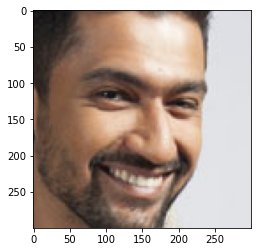

True BMI 25.2493372
Predicted BMI 3:  21.811096
Predicted BMI 6:  25.462470505969005
Difference:  3.4382410085937494
*************************************************************************

15


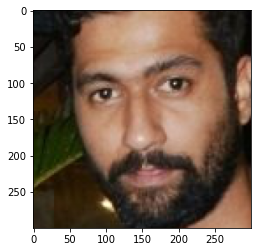

True BMI 25.2493372
Predicted BMI 3:  22.804987
Predicted BMI 6:  25.02729359627419
Difference:  2.444350246264648
*************************************************************************

16


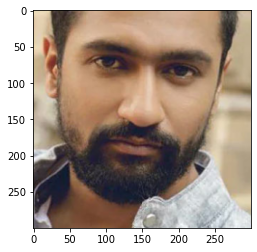

True BMI 25.2493372
Predicted BMI 3:  21.853645
Predicted BMI 6:  25.194226590344503
Difference:  3.395691875292968
*************************************************************************

17


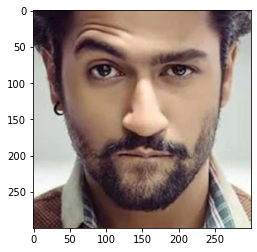

True BMI 25.2493372
Predicted BMI 3:  28.307665
Predicted BMI 6:  25.009074144114276
Difference:  3.058327671215821
*************************************************************************

18


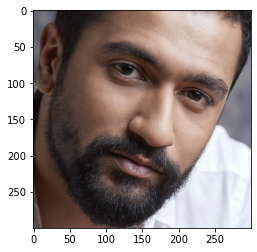

True BMI 25.2493372
Predicted BMI 3:  22.864199
Predicted BMI 6:  24.973779642696844
Difference:  2.3851385153076166
*************************************************************************



In [22]:
true_bmi=[]
predicted_bmi1=[]
predicted_bmi2=[]
predicted_bmi3=[]
predicted_bmi4=[]

predicted_bmi6=[]

for ii,path in enumerate(all_paths_val[200:]):
    print(ii)
    if ii ==112 or ii==164 or ii==0:
        continue
    image_path=str(path)
    img = cv2.imread(image_path)
    data = image.imread(image_path)
    new_image=preprocess_image(img,data,image_path=None)
    

        
    if isinstance(new_image,np.ndarray):
        new_image1=np.expand_dims(new_image,axis=0)[:,:,:,:3]

        plt.imshow(new_image1[0,:,:,:])
        plt.show()
        bmi_predict=loaded_model1.predict(new_image1/255.0)
        bmi_predict2=loaded_model2.predict(new_image1/255.0)
        bmi_predict3=loaded_model3.predict(new_image1/255.0)
        bmi_predict4=loaded_model4.predict(new_image1/255.0)
        
        ## Random Fprest Regresspr
        bmi_predict6=loaded_model6.predict(np.array(get_face_encoding_from_message(new_image[:,:,:3])).reshape(1,-1))


        print('True BMI', all_bmi_val.iloc[ii])
#         print('Predicted BMI 1: ',bmi_predict[0][0])
#         print('Predicted BMI 2: ',bmi_predict2[0][0])
        print('Predicted BMI 3: ',bmi_predict3[0][0])
#         print('Predicted BMI 4: ',bmi_predict4[0][0])
        print('Predicted BMI 6: ',bmi_predict6[0])
        print('Difference: ',np.abs(all_bmi_val.iloc[ii]-bmi_predict3[0][0]))
        print('*************************************************************************\n')
        true_bmi.append(all_bmi_val.iloc[ii])
        predicted_bmi1.append(bmi_predict[0][0])
        predicted_bmi2.append(bmi_predict2[0][0])
        predicted_bmi3.append(bmi_predict3[0][0])
        predicted_bmi4.append(bmi_predict4[0][0])
        predicted_bmi6.append(bmi_predict6[0])



In [23]:
ii

18

In [24]:
new_image1.shape

(1, 300, 300, 3)

In [25]:
        bmi_predict=loaded_model1.predict(new_image1/255.0)
        bmi_predict2=loaded_model2.predict(new_image1/255.0)
        bmi_predict3=loaded_model3.predict(new_image1/255.0)
        bmi_predict4=loaded_model4.predict(new_image1/255.0)

Text(0, 0.5, 'BMI')

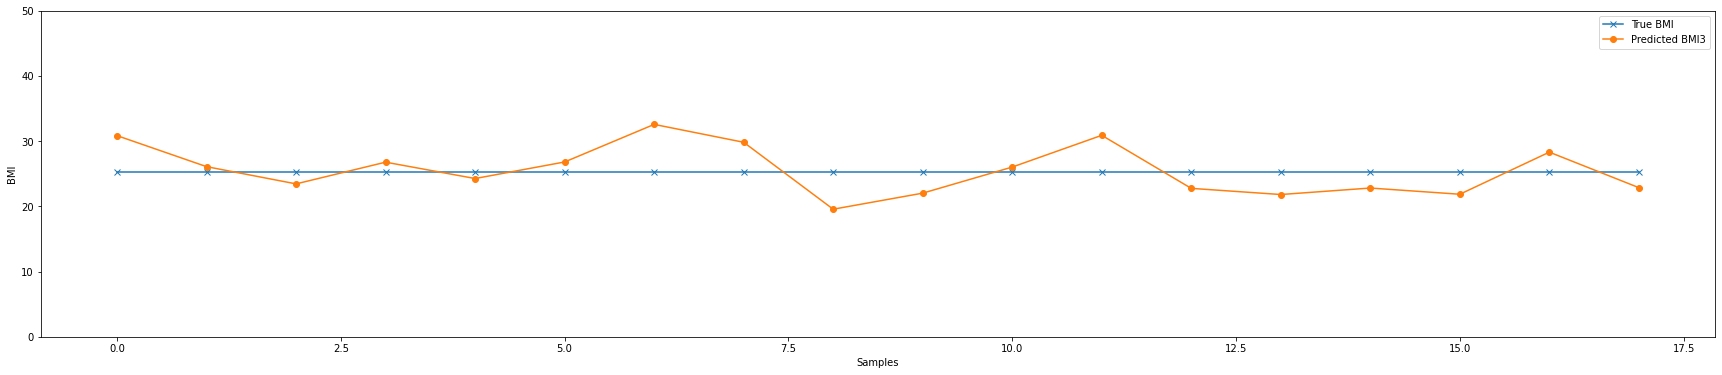

In [26]:
plt.figure(figsize=(30,6))
plt.plot(true_bmi,'x-',label='True BMI')
plt.plot(predicted_bmi3,'o-',label='Predicted BMI3')
plt.ylim(0,50)
plt.legend()

plt.xlabel('Samples')
plt.ylabel('BMI')

Text(0, 0.5, 'BMI')

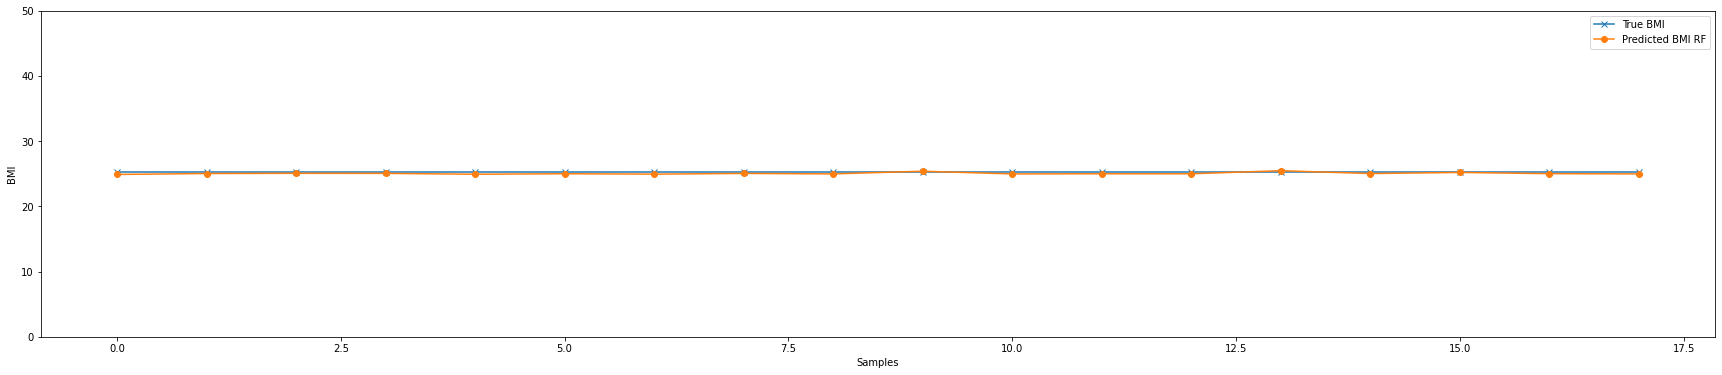

In [27]:
plt.figure(figsize=(30,6))
plt.plot(true_bmi,'x-',label='True BMI')
plt.plot(predicted_bmi6,'o-',label='Predicted BMI RF')
plt.ylim(0,50)
plt.legend()

plt.xlabel('Samples')
plt.ylabel('BMI')

In [28]:
truenp=np.array(true_bmi)
predictnp=np.array(predicted_bmi3)

Text(0, 0.5, 'BMI')

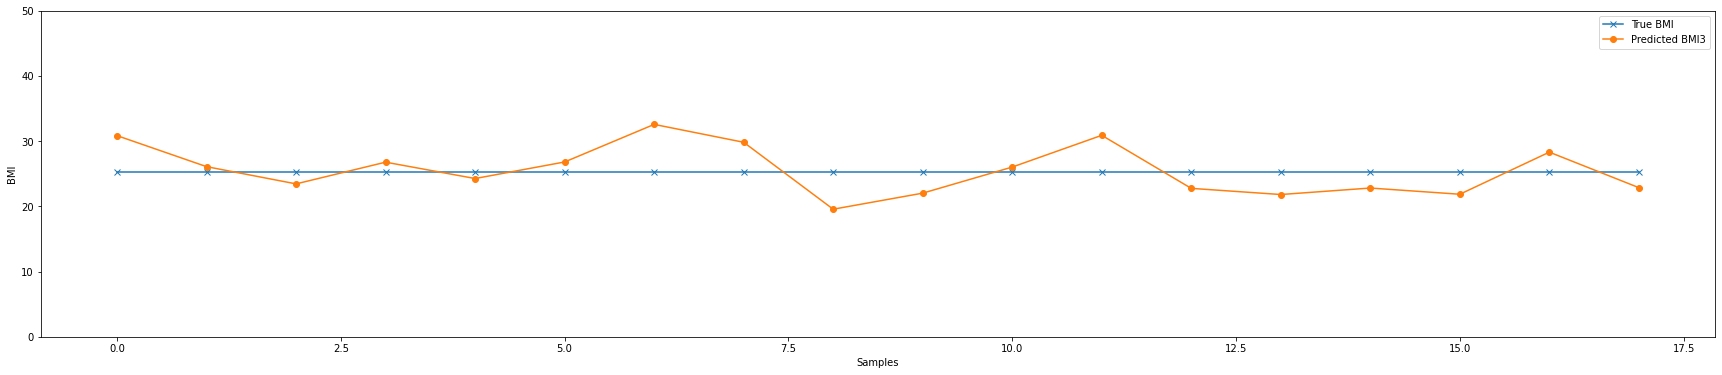

In [29]:
plt.figure(figsize=(30,6))
plt.plot(truenp[truenp<35],'x-',label='True BMI')
# plt.plot(predicted_bmi1,'o-',label='Predicted BMI1')
# plt.plot(predicted_bmi2,'o-',label='Predicted BMI2')
plt.plot(predictnp[truenp<35],'o-',label='Predicted BMI3')
#plt.plot(predicted_bmi4,'o-',label='Predicted BMI4')
plt.ylim(0,50)
plt.legend()
plt.xlabel('Samples')
plt.ylabel('BMI')

Text(0, 0.5, 'BMI')

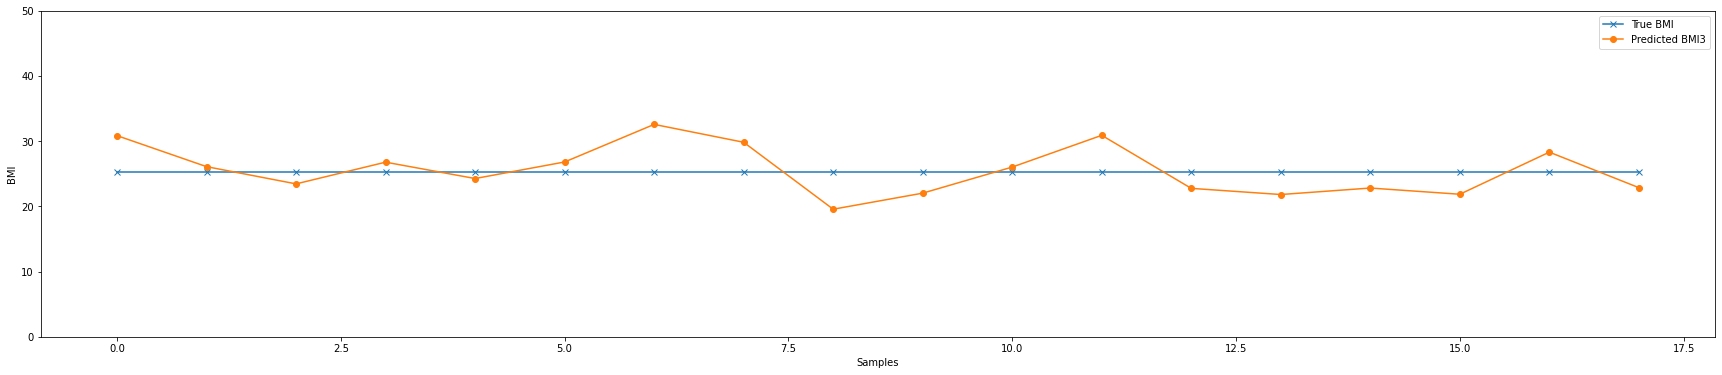

In [30]:
plt.figure(figsize=(30,6))
plt.plot(true_bmi[:50],'x-',label='True BMI')
# plt.plot(predicted_bmi1,'o-',label='Predicted BMI1')
# plt.plot(predicted_bmi2,'o-',label='Predicted BMI2')
plt.plot(predicted_bmi3[:50],'o-',label='Predicted BMI3')
#plt.plot(predicted_bmi4,'o-',label='Predicted BMI4')
plt.ylim(0,50)
plt.legend()
plt.xlabel('Samples')
plt.ylabel('BMI')

ValueError: x and y must be the same size

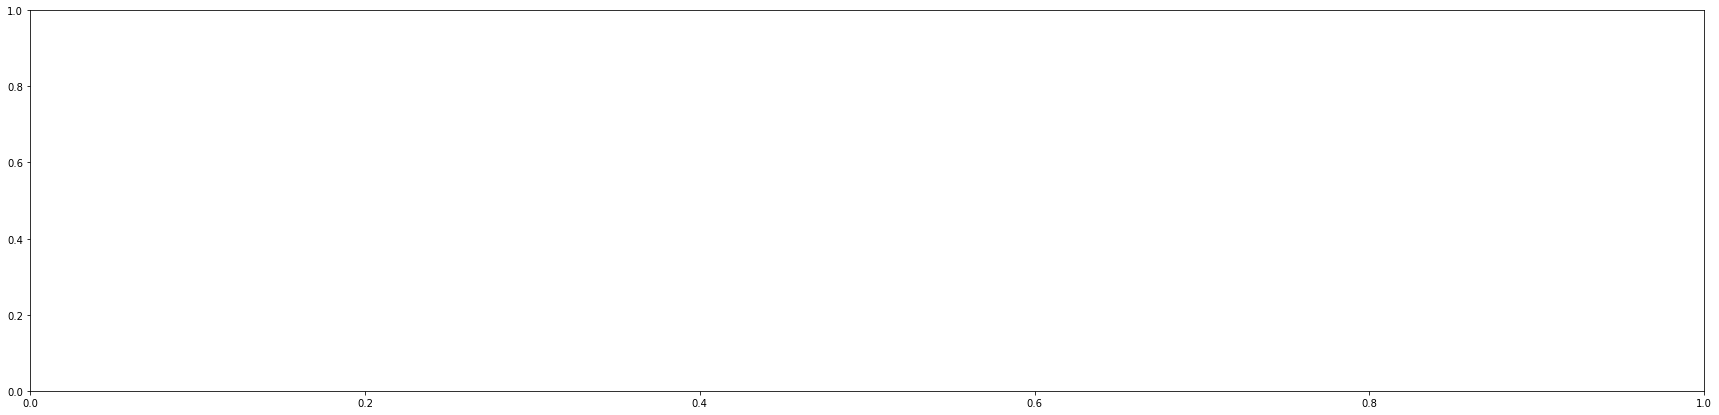

In [31]:
plt.figure(figsize=(30,7))
plt.scatter(np.arange(0,50,1),true_bmi[:50],label='True BMI')
# plt.plot(predicted_bmi1,'o-',label='Predicted BMI1')
# plt.plot(predicted_bmi2,'o-',label='Predicted BMI2')
plt.scatter(np.arange(0,50,1),predicted_bmi3[:50],label='Predicted BMI3',marker='x')
#plt.plot(predicted_bmi4,'o-',label='Predicted BMI4')
plt.legend()
plt.ylim(0,50)
plt.xlabel('Samples')
plt.ylabel('BMI')

In [32]:
## Mean Absolute Error Model 1
np.abs(np.array(true_bmi) - np.array(predicted_bmi1)).mean()

12.14233068949568

In [ ]:
## Mean Absolute Error Model 2
np.abs(np.array(true_bmi) - np.array(predicted_bmi2)).mean()

In [ ]:
## Mean Absolute Error Model 3
np.abs(np.array(true_bmi) - np.array(predicted_bmi3)).mean()

In [ ]:
## Mean Absolute Error Model 4
np.abs(np.array(true_bmi) - np.array(predicted_bmi4)).mean()

### Histograms for BMI

In [ ]:
plt.figure(figsize=(20,7))
plt.hist(true_bmi,bins=50)
plt.xlim(15,40)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Validation Dataset: True BMI')
plt.show()




plt.figure(figsize=(20,7))
plt.hist(predicted_bmi3,bins=50)
plt.xlim(15,40)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Validation Dataset: Predicted BMI, model 3')
plt.show()

